# Project: Investigate the No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset has records for patients visiting a certain clinic and here we are trying to find out the factors affecting whether a patient shows up to their appointment or not.

## Questions
> - Is one gender particularly more disciplined in keeping their appointments?
> - Does the place of residence affect going to appointments?
> - What effect do age groups have over discipline?
> - Does having a scholarship affect showing up to appointments?
> - Do sms messages have an effect on whether a person shows up or not?
> - What day in the week witnesses the most and least cancellations?
> - What month of the year has the most cancellations?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and assess it
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Columns should be renamed to lowercase letters and separated by '_' , also spelling mistakes should be corrected.
- SMS_received should be renamed to sms_sent
- PatientId and AppointmentID should be changed to Strings
- ScheduledDay and AppointmentDay should be datetime format
- No-show should be changed to boolean

#### Investigate data inside columns

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Age: there's a value of -1 which is incorrect. There is also a value of 115 which is highly unlikely.
- Handcap has a value of 4 which is invalid since allowed values are 0 or 1.

In [6]:
# checking for float values in Patient Id
(df['PatientId'] % 1  == 0).all()

False

In [7]:
df[df['PatientId'] % 1  != 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


- Invalid float patient ids should be removed

In [8]:
# checking for Handcap values
df.query('Handcap > 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


- The number of rows returned for this query is significant therefore we will assume that non zero values are true we will convert every value above 1 to 1

In [9]:
# Check for duplicates
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


- No duplicates found

In [10]:
#Check for age unique values
sorted(df.Age.unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

In [11]:
#Check Gender Values
df.Gender.unique()

array(['F', 'M'], dtype=object)

- Gender seems to contain valid entries

In [12]:
#Check for values of neighbourhood
sorted(df.Neighbourhood.unique())

['AEROPORTO',
 'ANDORINHAS',
 'ANTÔNIO HONÓRIO',
 'ARIOVALDO FAVALESSA',
 'BARRO VERMELHO',
 'BELA VISTA',
 'BENTO FERREIRA',
 'BOA VISTA',
 'BONFIM',
 'CARATOÍRA',
 'CENTRO',
 'COMDUSA',
 'CONQUISTA',
 'CONSOLAÇÃO',
 'CRUZAMENTO',
 'DA PENHA',
 'DE LOURDES',
 'DO CABRAL',
 'DO MOSCOSO',
 'DO QUADRO',
 'ENSEADA DO SUÁ',
 'ESTRELINHA',
 'FONTE GRANDE',
 'FORTE SÃO JOÃO',
 'FRADINHOS',
 'GOIABEIRAS',
 'GRANDE VITÓRIA',
 'GURIGICA',
 'HORTO',
 'ILHA DAS CAIEIRAS',
 'ILHA DE SANTA MARIA',
 'ILHA DO BOI',
 'ILHA DO FRADE',
 'ILHA DO PRÍNCIPE',
 'ILHAS OCEÂNICAS DE TRINDADE',
 'INHANGUETÁ',
 'ITARARÉ',
 'JABOUR',
 'JARDIM CAMBURI',
 'JARDIM DA PENHA',
 'JESUS DE NAZARETH',
 'JOANA D´ARC',
 'JUCUTUQUARA',
 'MARIA ORTIZ',
 'MARUÍPE',
 'MATA DA PRAIA',
 'MONTE BELO',
 'MORADA DE CAMBURI',
 'MÁRIO CYPRESTE',
 'NAZARETH',
 'NOVA PALESTINA',
 'PARQUE INDUSTRIAL',
 'PARQUE MOSCOSO',
 'PIEDADE',
 'PONTAL DE CAMBURI',
 'PRAIA DO CANTO',
 'PRAIA DO SUÁ',
 'REDENÇÃO',
 'REPÚBLICA',
 'RESISTÊNCIA',
 'RO

- The values seem correct, no modification here

### Data Cleaning

> Handling Dirty Data:
> - Columns should be renamed to lowercase letters and separated by '_' , also spelling mistakes should be corrected.
> - SMS_received should be renamed to sms_sent
> - Age: there's a value of -1 which is incorrect. There is also a value of 115 which is highly unlikely.
> - Handcap has a value of 4 which is invalid since allowed values are 0 or 1.
> - Invalid float patient ids should be removed

> Handling Messy Data:
> - ScheduledDay and AppointmentDay should be datetime format
> - PatientId and AppointmentID should be changed to Strings
> - No-show should be changed to boolean



<ol>
<li>Columns should be renamed to lowercase letters and separated by '_' , also spelling mistakes should be corrected.</li>

<li>SMS_received should be renamed to sms_sent.</li>
</ol>

In [13]:
df_copy = df.copy()

In [14]:
df_copy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [15]:
#Rename columns
df_copy.columns = df_copy.columns.str.lower()
df_copy.rename(columns = {'patientid':'patient_id', 'appointmentid':'appointment_id', 'Gender': 'gender', 'scheduledday':'scheduled_day',
                    'appointmentday': 'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap', 'sms_received':'sms_sent',
                    'no-show':'no_show'}, inplace=True)
#Verify changes
df_copy.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_sent',
       'no_show'],
      dtype='object')

3. Age: there's a value of -1 which is incorrect. There is also a value of 115 which is highly unlikely.

In [16]:
#Get rows with invalid ages
invalid_ages = df_copy.query('age == -1 or age == 115')
invalid_ages

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_sent,no_show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
#Drop rows with invalid ages
df_copy.drop(invalid_ages.index, inplace=True)

#Verify Changes
invalid_ages

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_sent,no_show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


4. Handcap has a value of 4 which is invalid since allowed values are 0 or 1.

In [18]:
#Replace values above 1 with 1
df_copy['handicap'].replace([2,3,4],1,inplace=True)

#Verify changes
df_copy.query('handicap > 1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_sent,no_show


5. Invalid float patient ids should be removed

In [19]:
invalid_patient_ids = df_copy[df_copy['patient_id'] % 1  != 0]
df_copy.drop(invalid_patient_ids.index,inplace=True)

#Verify changes
invalid_patient_ids

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_sent,no_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


6. ScheduledDay and AppointmentDay should be datetime format

In [20]:
df_copy['scheduled_day'] = pd.to_datetime(df_copy['scheduled_day'])
df_copy['appointment_day'] = pd.to_datetime(df_copy['appointment_day'])


7. PatientId and AppointmentID should be changed to Strings

In [21]:
df_copy['patient_id'] = df_copy['patient_id'].astype('str')
df_copy['appointment_id'] = df_copy['appointment_id'].astype('str')

8. No-show should be changed to boolean

In [22]:
df_copy = df_copy.replace({'no_show': {'Yes': True, 'No': False}})

In [23]:
#Verify data type changes
df_copy.dtypes

patient_id                      object
appointment_id                  object
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_sent                         int64
no_show                           bool
dtype: object

In [24]:
df_copy

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_sent,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,False
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,False
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,False
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,False


<a id='eda'></a>
## Exploratory Data Analysis


### General variable correlation

In [25]:
def zero_one(data, column):
    """
    This function turns a dataframe's column with 2 values into zeros and ones.
    
    Key Arguments:
    data   -- a Dataframe 
    column -- column name of type 'string'
    """
    data[column].replace({data[column].unique()[0]:0, data[column].unique()[1]:1}, inplace=True)

In [26]:
# making a copy of the Dataframe for adjusting for the correlation heatmap 
df_corr = df_copy.copy()

# Changing no_show and gender values to zeros and ones 
zero_one(df_corr, 'no_show')
zero_one(df_corr, 'gender')

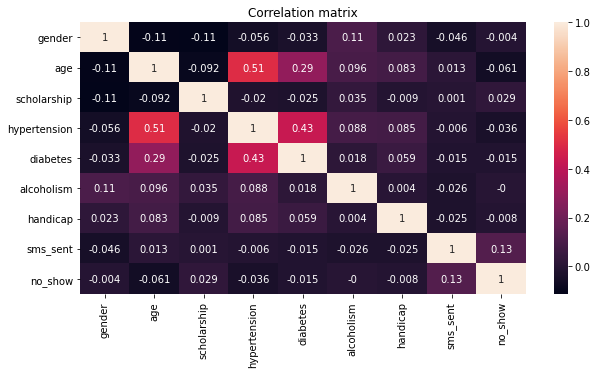

In [27]:
plt.figure(figsize = (10,5))
plt.title('Correlation matrix')
sns.heatmap(df_corr.corr().round(3), annot = True);

- We can see that there is no factor that stands out here with significant correlation in relation to no-show , so we're going to have to dig deeper with our questions.

### Is one gender particularly more disciplined in keeping their appointments?

- First let look at the male /female ratios in the dataset

In [28]:
#Number of total records
total = df_copy.shape[0]

In [29]:
males = df_copy.query('gender == "M"')
print('Male proportion', males.shape[0]/total )

Male proportion 0.3500398132397119


In [30]:
females = df_copy.query('gender == "F"')
print('Female proportion', females.shape[0]/total )

Female proportion 0.6499601867602881


Text(0, 0.5, 'Count')

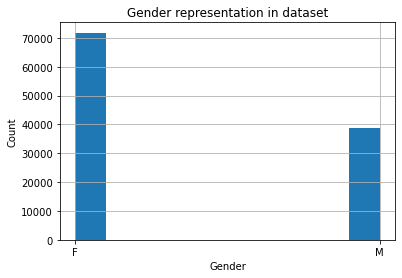

In [31]:
df_copy['gender'].hist()
plt.title('Gender representation in dataset');
plt.xlabel('Gender')
plt.ylabel('Count')

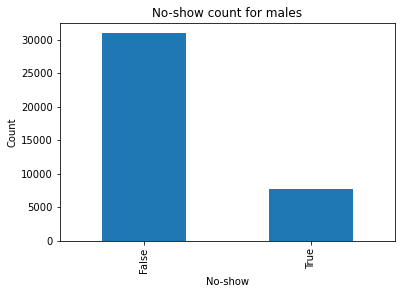

In [32]:
(males['no_show'].value_counts()).plot(kind = 'bar')
plt.title('No-show count for males')
plt.xlabel('No-show')
plt.ylabel('Count');

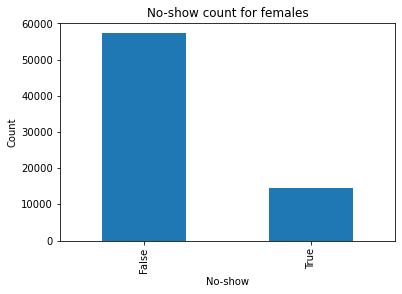

In [33]:
(females['no_show'].value_counts()).plot(kind='bar')
plt.title('No-show count for females')
plt.xlabel('No-show')
plt.ylabel('Count');

We need to find the proportions of each gender that are no-shows

In [34]:
(females['no_show'].value_counts()/females.shape[0])

False    0.79687
True     0.20313
Name: no_show, dtype: float64

In [35]:
(males['no_show'].value_counts()/males.shape[0])

False    0.80031
True     0.19969
Name: no_show, dtype: float64

> ### Conclusion
> The percentages are almost identical on normalizing by gender, therefore gender isn't a factor that affects whether a patient shows up to their appointment or not

### Does the place of residence affect going to appointments?

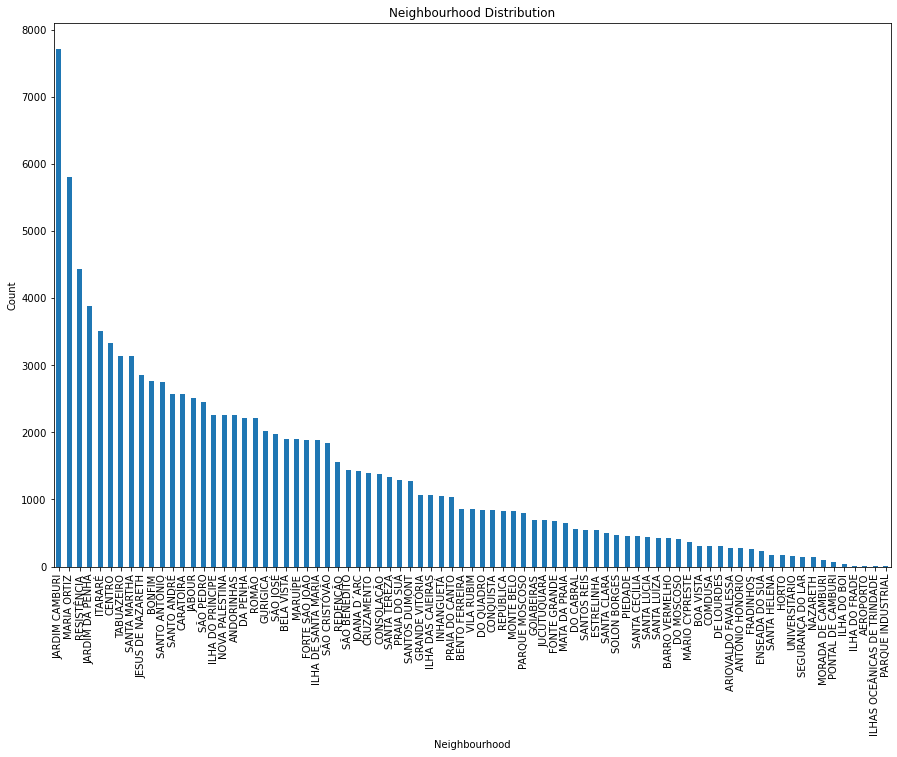

In [36]:
df_copy['neighbourhood'].value_counts().plot.bar(figsize=(15,10))
plt.xticks(rotation = 90)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood Distribution');

- Looking into this graph we notice that most of our population is from 'JARDIM CAMBURI' and we have the least of it is from 'PARQUE INDUSTRIAL'

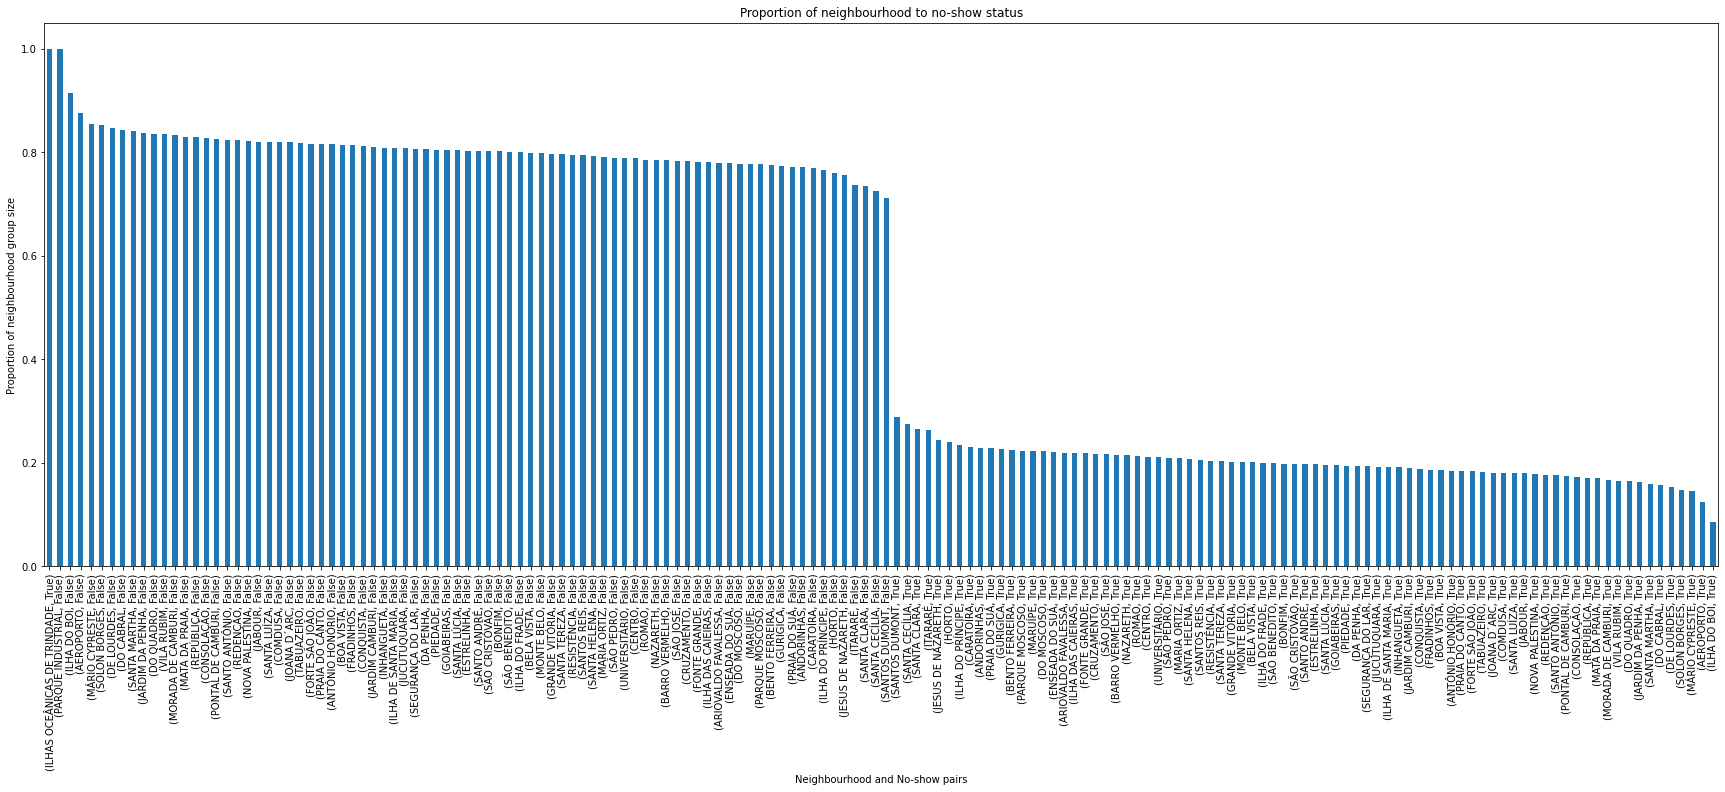

In [37]:
df_by_neighbourhood = df_copy.groupby('neighbourhood')
df_by_neighbourhood.size()
(df_by_neighbourhood['no_show'].value_counts()/(df_by_neighbourhood.size())).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,10))
plt.title('Proportion of neighbourhood to no-show status')
plt.xlabel('Neighbourhood and No-show pairs')
plt.ylabel('Proportion of neighbourhood group size');

In [38]:
df_by_neighbourhood.get_group('ILHAS OCEÂNICAS DE TRINDADE')['no_show'].count()

2

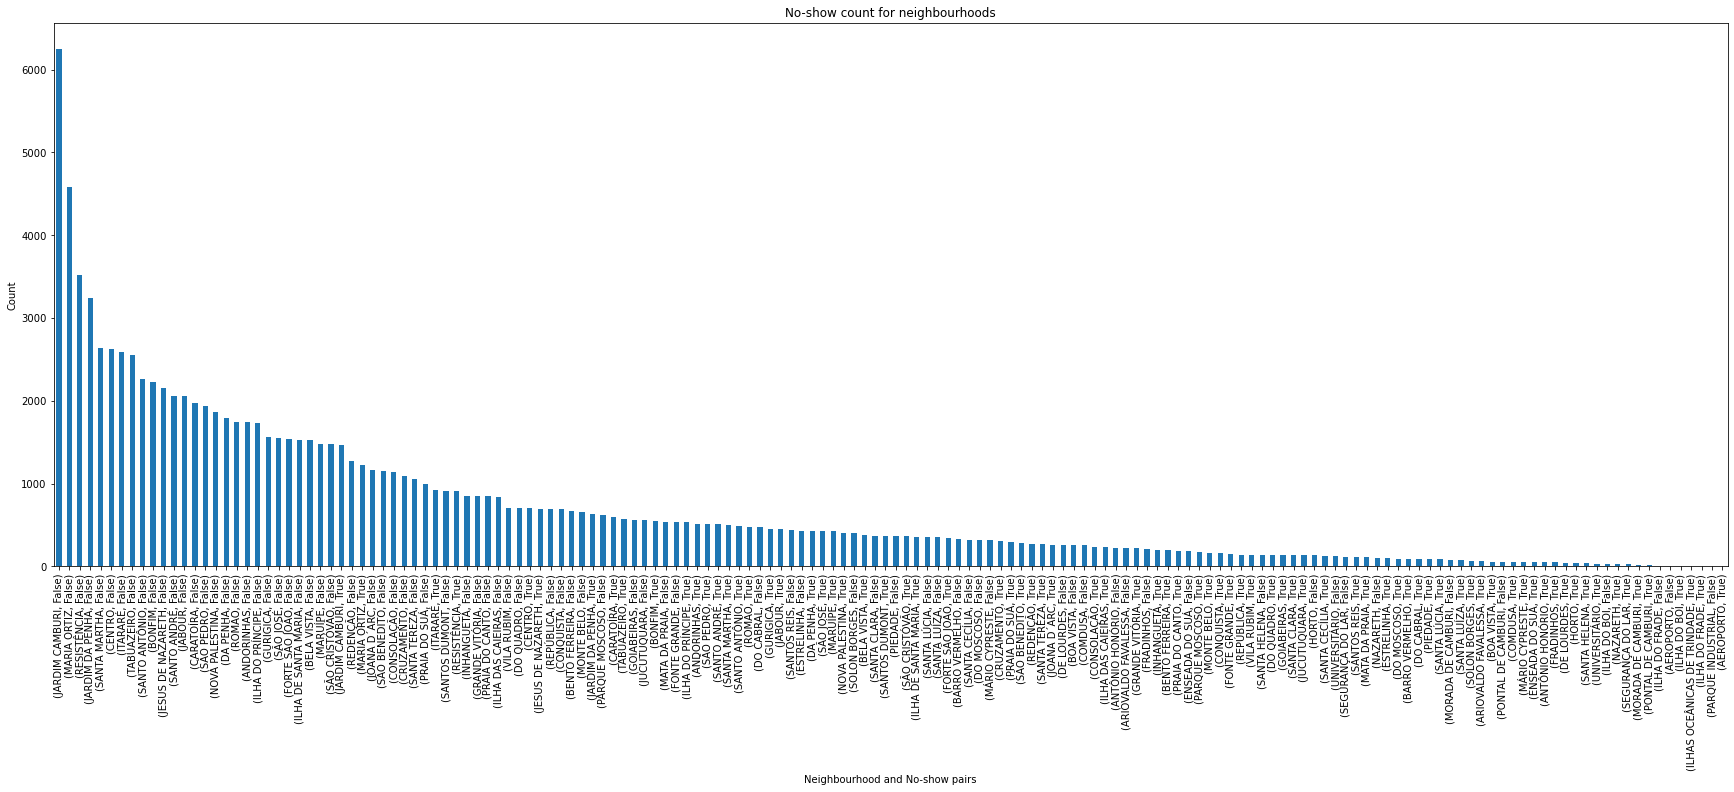

In [39]:
(df_by_neighbourhood['no_show'].value_counts()).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,10));
plt.title('No-show count for neighbourhoods')
plt.xlabel('Neighbourhood and No-show pairs')
plt.ylabel('Count');

- According to this graph which represents the proportion of no-show status divided by the size of the grouped neighbourhood:
    - The neighbourhood which has the highest proportion of no-shows is 'ILHAS OCEANICAS DE TRINDADE' with a ratio of 1 which means that all recorded entries for that neighbourhood is of no-shows which is 2 records

    - While the neighbourhood with the highest number of no-shows in absolute form is 'JARDIM CAMBURI' which makes sense since it is the neighbourhood with the highest number of records in general.


### What effect do age groups have over discipline?

- First let's look at the age distribution in our dataset

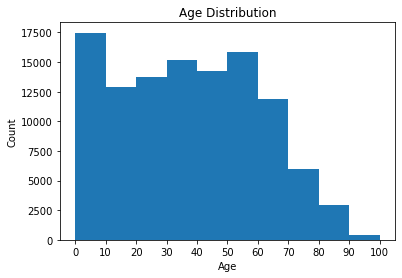

In [40]:
# For approximation reasons we'll be discarding the entries between 100 : 102 years
n,bins,patches = plt.hist(df_copy.age,range = (0,100))
plt.xticks(bins)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

- The majority of our data set is 0-10 years old followed by the 50-60 range then 30-40, the least representation id for the 90-100 age range

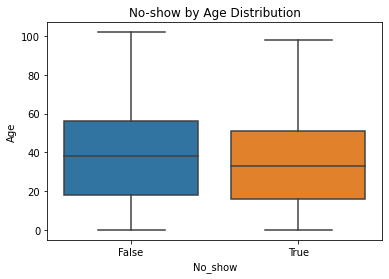

In [41]:
sns.boxplot(x="no_show", y="age", data=df_copy.reset_index())
plt.title('No-show by Age Distribution')
plt.xlabel('No_show')
plt.ylabel('Age');

> #### Conclusion
> - Looking at the boxplot representation of ages of people who are no-shows vs. those who aren't. The distribution looks similar seems age doesn't play a big factor in deciding no_shows and that 50% of no-showers are between 0 and almost 35 years old.

### Does having a scholarship affect showing up to appointments?

In [42]:
df_copy.scholarship.value_counts()

0    99655
1    10861
Name: scholarship, dtype: int64

In [43]:
10861/99655

0.10898600170588531

- according to these values the number of scholarship holders are 10% of the number of people without scholarships

In [44]:
df_by_scholarship = df_copy.groupby('scholarship')
no_show_by_scholarship = df_by_scholarship['no_show'].value_counts()/df_by_scholarship.size()
no_show_by_scholarship

scholarship  no_show
0            False      0.801937
             True       0.198063
1            False      0.762637
             True       0.237363
dtype: float64

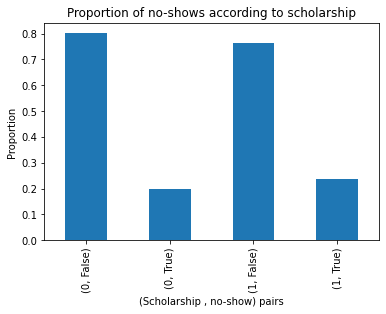

In [45]:
no_show_by_scholarship.plot.bar()
plt.title('Proportion of no-shows according to scholarship')
plt.xlabel('(Scholarship , no-show) pairs')
plt.ylabel('Proportion');

- From the numbers shown here we can tell that the percentage of scholarship holder no-showers is approximately 24% while that of no-showers for non-scholarship holders is approx. 20%.
> #### Conclusion
> Scholarships do have an effect on people showing up to appointments

### Do sms messages have an effect on whether a person shows up or not?

In [46]:
# Sms messages are sent for ~32% of the cases 
df_copy.sms_sent.value_counts()/df_copy.shape[0]

0    0.678961
1    0.321039
Name: sms_sent, dtype: float64

In [47]:
df_by_sms = df_copy.groupby('sms_sent')
no_show_by_sms = df_by_sms['no_show'].value_counts()/df_by_sms.size()
no_show_by_sms

sms_sent  no_show
0         False      0.832987
          True       0.167013
1         False      0.724239
          True       0.275761
dtype: float64

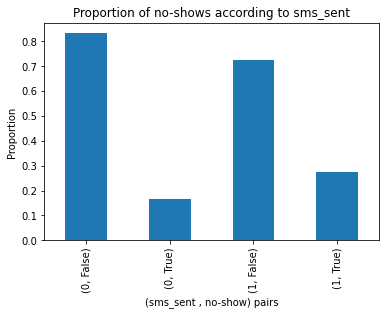

In [48]:
no_show_by_sms.plot.bar();
plt.title('Proportion of no-shows according to sms_sent')
plt.xlabel('(sms_sent , no-show) pairs')
plt.ylabel('Proportion');

- Surprisingly for the people reminded by sms messages with their appointments the proportion of people missing their appointments after being reminded is greater than the proportion missing their appointments without reminders
- This begs the question, are the people being reminded scholarship holders? since we've already found that scholarship holders tend to miss appointments more often.

In [49]:
df_by_sms['scholarship'].value_counts()/df_by_sms.size()

sms_sent  scholarship
0         0              0.901967
          1              0.098033
1         0              0.901212
          1              0.098788
dtype: float64

- After this quick calculation seems that non-scholarship holders are reminded about appointments more that scholarship holders which answers former question.

### What day in the week witnesses the most and least cancellations?

In [50]:
df_copy['appointment_day_of_week']=df_copy.appointment_day.dt.strftime('%A')

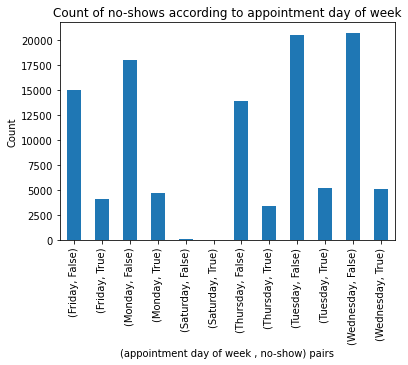

In [51]:
df_group_dow = df_copy.groupby('appointment_day_of_week')
df_group_dow['no_show'].value_counts().plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Count of no-shows according to appointment day of week')
plt.xlabel('(appointment day of week , no-show) pairs')
plt.ylabel('Count')
plt.show();

- From the plot we can tell that the day with the most no-shows is **Tuesday** and the one with the least no-shows is **Thursday**

### What month of the year has the most cancellations?

In [52]:
df_copy['appointment_month'] = df_copy.appointment_day.dt.strftime('%B')

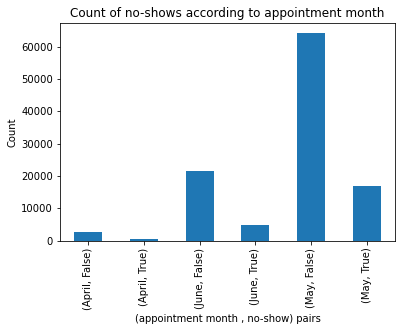

In [53]:
df_group_month = df_copy.groupby('appointment_month')
df_group_month['no_show'].value_counts().plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Count of no-shows according to appointment month')
plt.xlabel('(appointment month , no-show) pairs')
plt.ylabel('Count');
plt.show();

- According to this plot we can see that there's a trend of increasing no-shows as we move further in time given that the records are over 3 months only and in the same year.

<a id='conclusions'></a>
## Conclusions

> From the analysis we can find that there are days and months which have most/least no-shows , we should gather more info about the working conditions during these days/months to find out if there are particular factors affecting no_shows. We also found out that the proportion of scholarship holders tend to miss more appointments we need to investigate why that happens with more information gathering.

### Limitations:
> A lot of neighbourhoods are under represented in the dataset, we need more info on the neighbourhoods to determine if it has an effect on not showing up